# Anomaly Detection in Time-Series Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import time

## Data Preprocessing

In [5]:
column_names = [
    "duration", 
    "protocol_type", 
    "service", 
    "flag", 
    "src_bytes", 
    "dst_bytes", 
    "land", 
    "wrong_fragment", 
    "urgent", 
    "hot", 
    "num_failed_logins", 
    "logged_in", 
    "num_compromised", 
    "root_shell", 
    "su_attempted", 
    "num_root", 
    "num_file_creations", 
    "num_shells", 
    "num_access_files", 
    "num_outbound_cmds", 
    "is_host_login", 
    "is_guest_login", 
    "count", 
    "srv_count", 
    "serror_rate", 
    "srv_serror_rate", 
    "rerror_rate", 
    "srv_rerror_rate", 
    "same_srv_rate", 
    "diff_srv_rate", 
    "srv_diff_host_rate", 
    "dst_host_count", 
    "dst_host_srv_count", 
    "dst_host_same_srv_rate", 
    "dst_host_diff_srv_rate", 
    "dst_host_same_src_port_rate", 
    "dst_host_srv_diff_host_rate", 
    "dst_host_serror_rate", 
    "dst_host_srv_serror_rate", 
    "dst_host_rerror_rate", 
    "dst_host_srv_rerror_rate", 
]
column_names += ["target"]

### Column names


duration: continuous.  
protocol_type: symbolic.  
service: symbolic.  
flag: symbolic.  
src_bytes: continuous.  
dst_bytes: continuous.  
land: symbolic.  
wrong_fragment: continuous.  
urgent: continuous.  
hot: continuous.  
num_failed_logins: continuous.  
logged_in: symbolic.  
num_compromised: continuous.  
root_shell: continuous.  
su_attempted: continuous.  
num_root: continuous.  
num_file_creations: continuous.  
num_shells: continuous.  
num_access_files: continuous.  
num_outbound_cmds: continuous.  
is_host_login: symbolic.  
is_guest_login: symbolic.  
count: continuous.  
srv_count: continuous.  
serror_rate: continuous.  
srv_serror_rate: continuous.  
rerror_rate: continuous.  
srv_rerror_rate: continuous.  
same_srv_rate: continuous.  
diff_srv_rate: continuous.  
srv_diff_host_rate: continuous.  
dst_host_count: continuous.  
dst_host_srv_count: continuous.  
dst_host_same_srv_rate: continuous.  
dst_host_diff_srv_rate: continuous.  
dst_host_same_src_port_rate: continuous.  
dst_host_srv_diff_host_rate: continuous.  
dst_host_serror_rate: continuous.  
dst_host_srv_serror_rate: continuous.  
dst_host_rerror_rate: continuous.  
dst_host_srv_rerror_rate: continuous.  

In [6]:
attack_map = {
    "normal": "normal",
    "back": "dos", 
    "buffer_overflow": "u2r", 
    "ftp_write": "r2l", 
    "guess_passwd": "r2l", 
    "imap": "r2l", 
    "ipsweep": "probe", 
    "land": "dos", 
    "loadmodule": "u2r", 
    "multihop": "r2l", 
    "neptune": "dos", 
    "nmap": "probe", 
    "perl": "u2r", 
    "phf": "r2l", 
    "pod": "dos", 
    "portsweep": "probe", 
    "rootkit": "u2r", 
    "satan": "probe", 
    "smurf": "dos", 
    "spy": "r2l", 
    "teardrop": "dos", 
    "warezclient": "r2l", 
    "warezmaster": "r2l"
}

In [59]:
df = pd.read_csv("kddcup.data_10_percent.csv", index_col=False, names=column_names)

In [60]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [61]:
df["attack_type"] = df["target"].map(lambda x: attack_map[x[:-1]])

In [62]:
df.shape

(494021, 43)

In [63]:
df.attack_type.value_counts()

attack_type
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64

<BarContainer object of 2 artists>

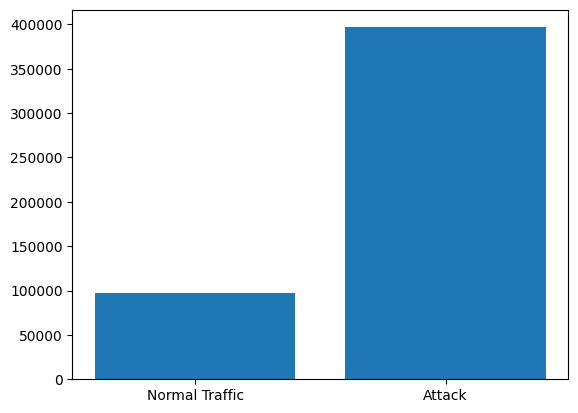

In [ ]:
#Traffic distribution

normal_traffic = int(df.attack_type.value_counts()["normal"])
attack_traffic = int(df.value_counts().sum()) - normal_traffic
names = ["Normal Traffic", "Attack"]
values = [normal_traffic, attack_traffic]
plt.bar(names, values)

In [12]:
df.target.value_counts()

target
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [14]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [15]:
#Categorical features

cat_columns = df.select_dtypes(include=["object"]).columns.to_list()
cat_columns

['protocol_type', 'service', 'flag', 'target', 'attack_type']

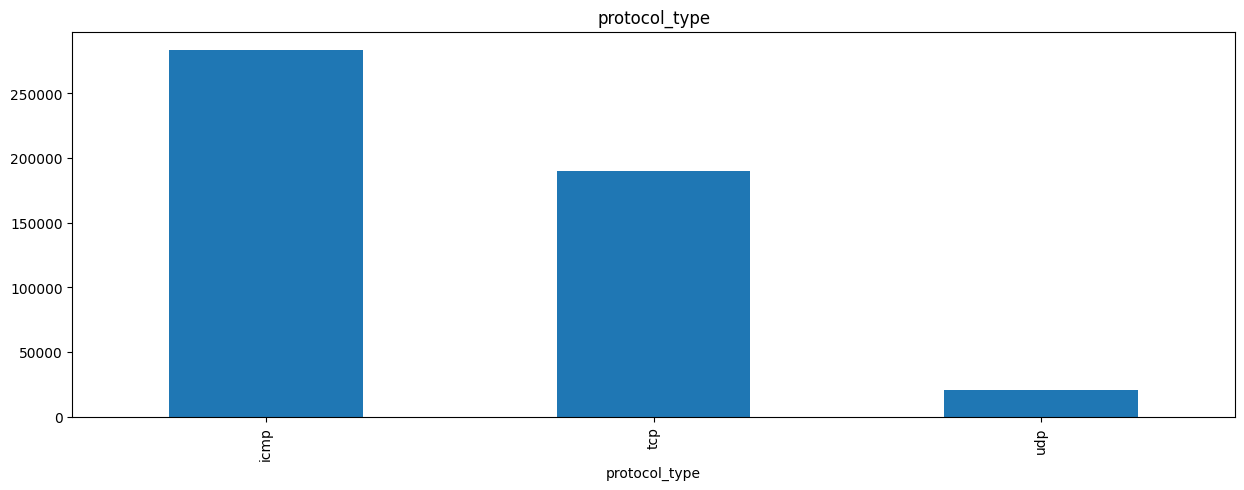

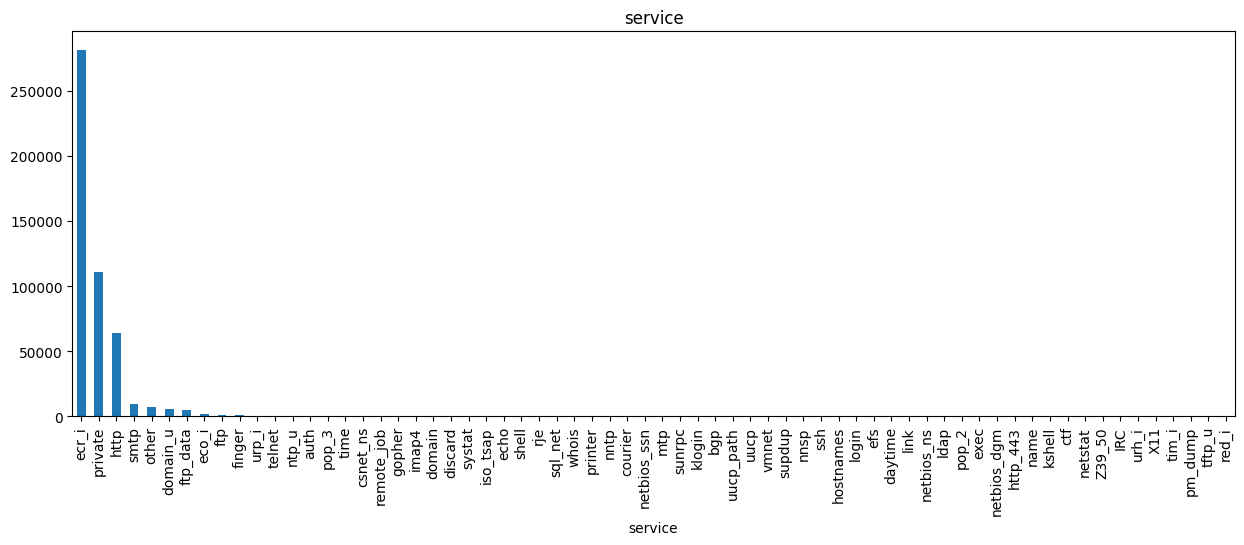

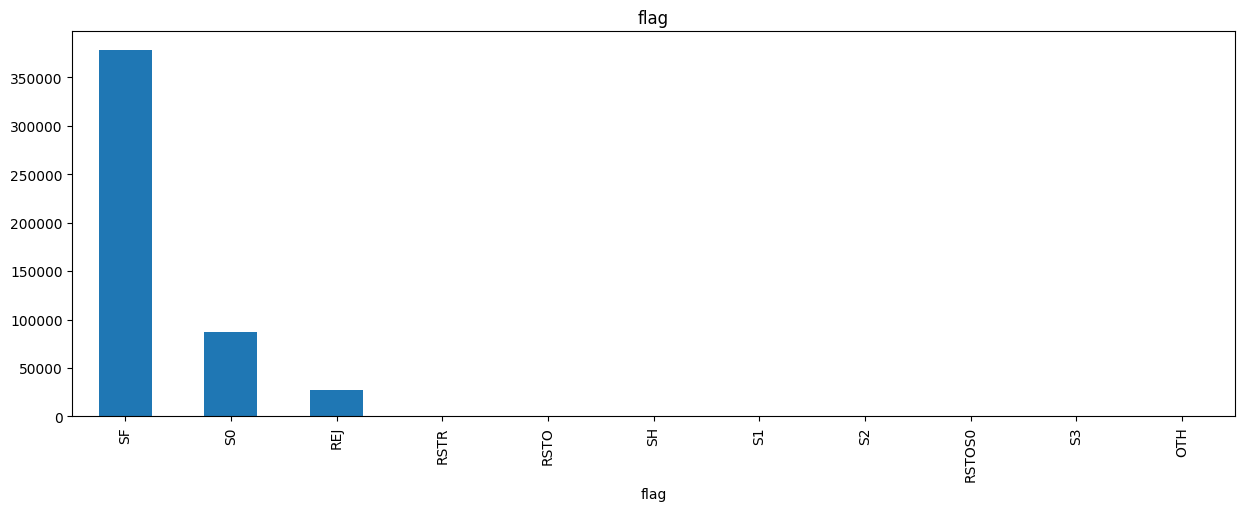

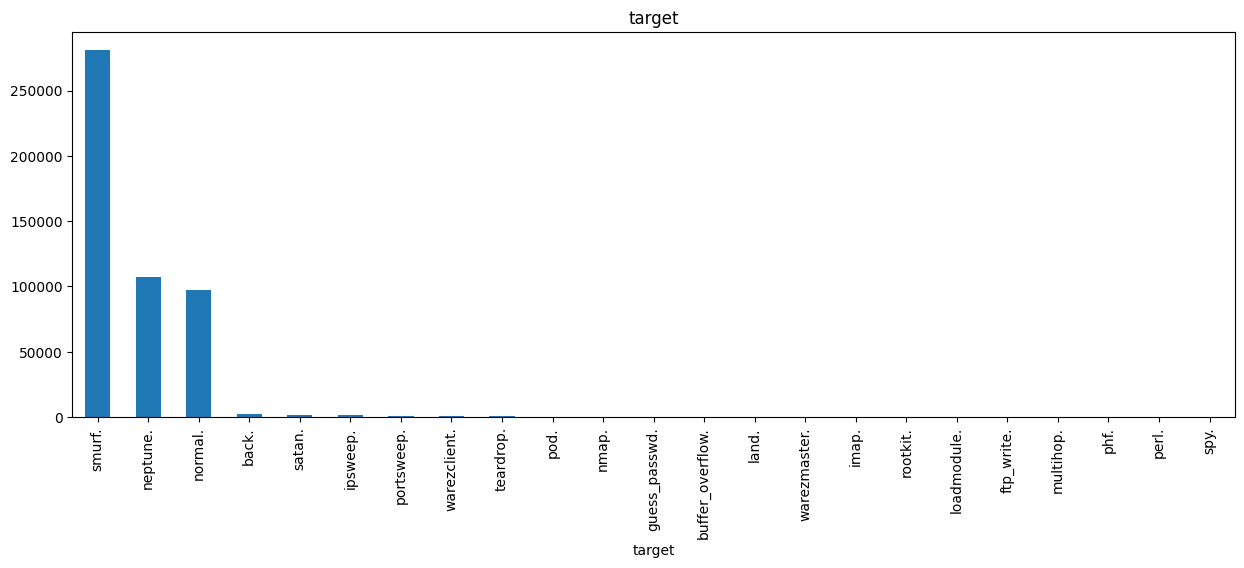

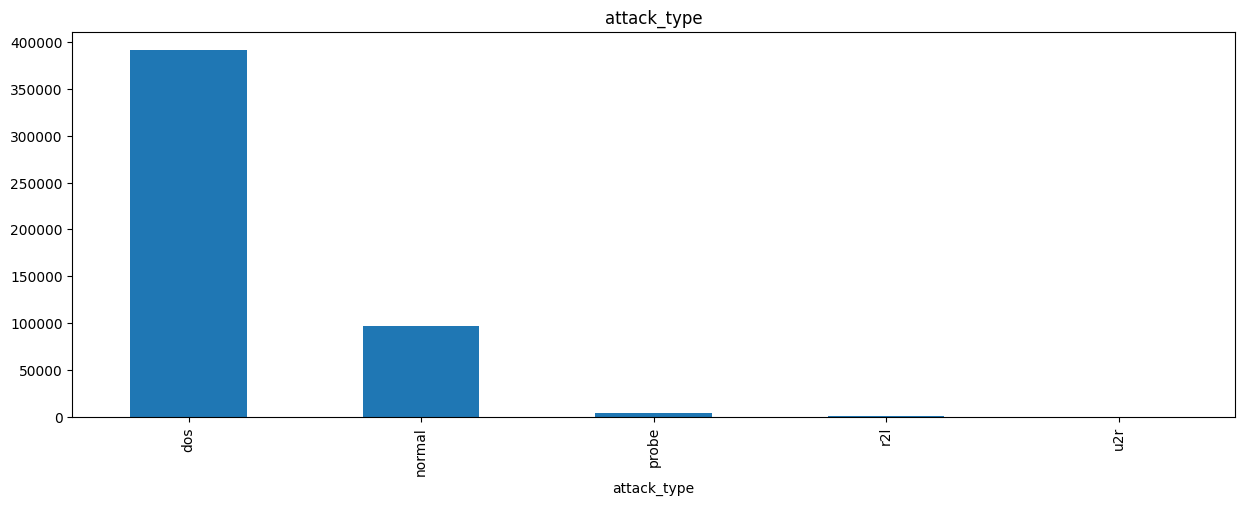

In [16]:
for col in cat_columns:
    plt.figure(figsize=(15, 5))
    df[col].value_counts().plot(kind="bar", title=col)
    plt.show()

In [17]:
#Droping columns with only one unique value

c = [col for col in df.columns if df[col].nunique() > 1]
print(set(df.columns) - set(c))
df = df[c]

{'num_outbound_cmds', 'is_host_login'}


In [18]:
##numerical features

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns.to_list()

### Converting Categorical Features

In [19]:
cat_columns.remove("target")
cat_columns.remove("attack_type")


# encoder = LabelEncoder()
# for col in cat_columns:
#     df[col] = encoder.fit_transform(df[col])

df = pd.get_dummies(df, columns=cat_columns)

In [20]:
#Target encoding

df["target"] = df["target"].map(lambda x: 0 if x == "normal." else 1)

## Simulating a Time Component

In [21]:
df["timestamp"] = pd.to_datetime(pd.Series(range(len(df))), unit="s")
df.set_index("timestamp", inplace=True)

In [22]:
# Rolling Window Aggregation

window_size = 100 # 100 rows

df["count_connections"] = df["target"].rolling(window=window_size).count()
df["mean_src_bytes"] = df["src_bytes"].rolling(window=window_size).mean()
df["std_dst_bytes"] = df["dst_bytes"].rolling(window=window_size).std()
df["max_duration"] = df["duration"].rolling(window=window_size).max()
df["min_failed_logins"] = df["num_failed_logins"].rolling(window=window_size).min()

#filling NaN values with 0 for the first few rows
df.fillna(0, inplace=True)

numerical_columns += [
    "count_connections",
    "mean_src_bytes",
    "std_dst_bytes",
    "max_duration",
    "min_failed_logins"
]

## Normalizing numerical features

In [23]:
df_std = df[numerical_columns].std()
df_std = df_std.sort_values(ascending=True)
df_std

min_failed_logins                   0.000000
urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
dst_host_srv_rerror_rate            0.230140
dst_host_rerror_rate                0.230590
rerror_rate                         0.231623
srv_rerror_rate                     0.232147
logged_in                           0.355345
dst_host_serror_rate                0.380593
serror_rate                         0.380717
dst_host_s

In [24]:
df.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH',
       'count_connections', 'mean_src_bytes', 'std_dst_bytes', 'max_duration',
       'min_failed_logins'],
      dtype='object', length=123)

In [25]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,count_connections,mean_src_bytes,std_dst_bytes,max_duration,min_failed_logins
timestamp,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00,0.0,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,True,False,0.0,0.0,0.0,0.0,0.0
1970-01-01 00:00:01,0.0,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,True,False,0.0,0.0,0.0,0.0,0.0
1970-01-01 00:00:02,0.0,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,True,False,0.0,0.0,0.0,0.0,0.0
1970-01-01 00:00:03,0.0,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,True,False,0.0,0.0,0.0,0.0,0.0
1970-01-01 00:00:04,0.0,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,True,False,0.0,0.0,0.0,0.0,0.0


### Correlation Analysis

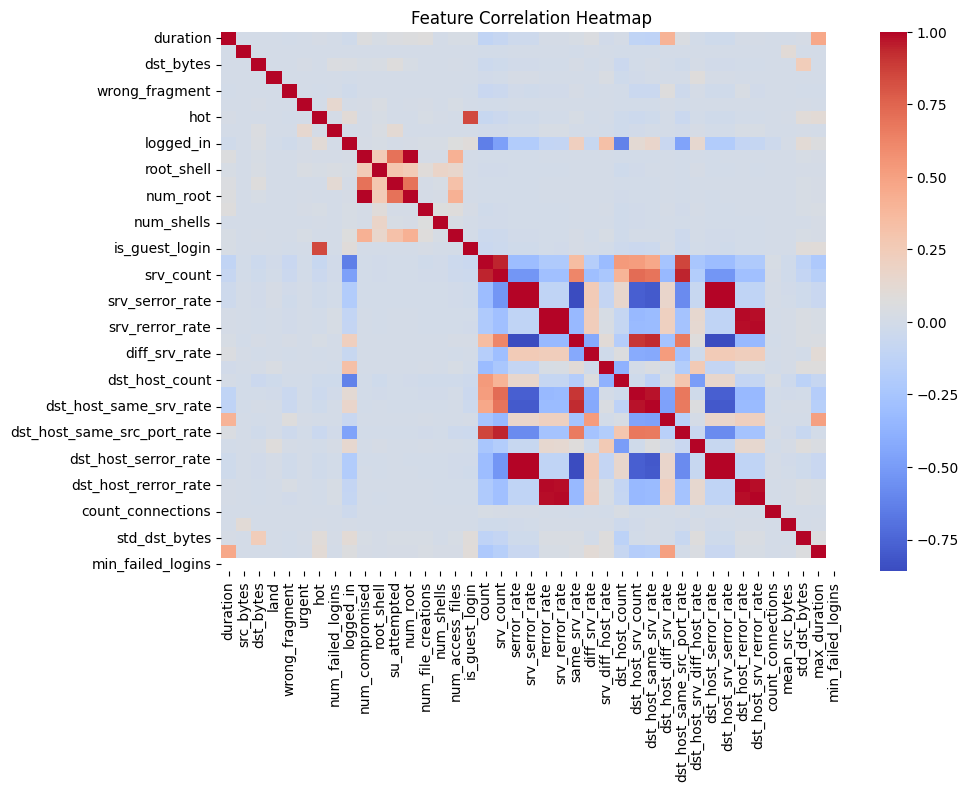

In [26]:
plt.figure(figsize=(10, 7))
sns.heatmap(df[numerical_columns].corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [27]:
corr_matrix = df[numerical_columns].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

#Threshold for correlation
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.85)]
print("Highly Correlated Features:", high_corr_features)

Highly Correlated Features: ['num_root', 'srv_count', 'srv_serror_rate', 'srv_rerror_rate', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [28]:
# Drop highly correlated features
# df.drop(columns=high_corr_features, inplace=True)


#Dropping higly correlated features is one option but I chose to use PSA

In [29]:
df.drop("attack_type", axis=1, inplace=True)

## Applying PCA

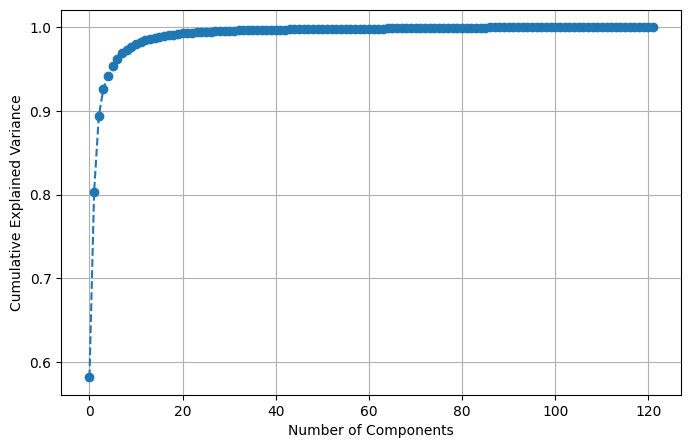

In [30]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df)

# Ploting cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

In [31]:
# I chose 20 components because after that the line flattens

n_components = 20

pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df[numerical_columns])

df_pca = pd.DataFrame(df_pca, columns=[f"PCA_{i}" for i in range(n_components)], index=df.index)
df_pca["target"] = df["target"]

df_pca.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,...,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,target
timestamp,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00,-0.440642,1.375971,-0.463538,-0.369160,-0.402756,0.383532,-0.171790,-0.336877,-0.182758,0.020898,...,-0.163114,-0.006826,-0.073265,-0.134915,-0.010814,-0.042398,-0.009383,-0.012660,-0.001848,0
1970-01-01 00:00:01,-0.448683,1.387117,-0.471677,-0.322245,-0.351356,0.362474,-0.162087,-0.345202,-0.168418,0.041671,...,-0.157507,-0.009076,-0.074318,-0.133728,-0.012362,-0.034775,-0.010390,-0.017133,-0.002055,0
1970-01-01 00:00:02,-0.442160,1.385727,-0.476689,-0.291651,-0.311682,0.345472,-0.156604,-0.333181,-0.160155,0.046025,...,-0.151882,-0.009170,-0.072438,-0.128943,-0.012491,-0.031346,-0.010313,-0.018226,-0.002094,0
1970-01-01 00:00:03,-0.430727,1.381176,-0.480901,-0.270582,-0.277644,0.327930,-0.154037,-0.309646,-0.155081,0.040428,...,-0.146466,-0.008119,-0.068722,-0.122015,-0.011792,-0.030482,-0.009573,-0.017221,-0.002034,0
1970-01-01 00:00:04,-0.420563,1.376653,-0.485132,-0.244068,-0.240902,0.311942,-0.149609,-0.292538,-0.148338,0.040677,...,-0.140836,-0.007674,-0.066108,-0.116332,-0.011566,-0.028100,-0.009225,-0.017470,-0.002031,0


## Model training

In [32]:
# Base line

target_values = df_pca["target"].value_counts().to_dict()
base_line = target_values[0]/target_values[1]
base_line

0.24519147155715412

If we choose attack for all the records, we can get up to 75% accuracy

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.ensemble import IsolationForest


X = df_pca.drop(columns=["target"])
Y = df_pca["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=22)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(395216, 20) (98805, 20)
(395216,) (98805,)


### XGboost

In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report

# Train XGBoost model
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, Y_train)

# Predict on test data
y_pred_xgb = xgb.predict(X_test)

# Evaluate F1-score
f1_xgb = f1_score(Y_test, y_pred_xgb)
print(f"XGBoost F1 Score: {round(f1_xgb, 4)}")

# Print classification report
print(classification_report(Y_test, y_pred_xgb))

XGBoost F1 Score: 0.9995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19150
           1       1.00      1.00      1.00     79655

    accuracy                           1.00     98805
   macro avg       1.00      1.00      1.00     98805
weighted avg       1.00      1.00      1.00     98805



## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=50)

start_time = time.time()
random_forest.fit(X_train, Y_train)
finish_time = time.time()

y_pred_rf = random_forest.predict(X_test)
f1_random_forest = f1_score(Y_test, y_pred_rf)
print(f"Time take to trian: {finish_time - start_time:.1f}")
print(f"F1 score for Random Forest:  {f1_random_forest:.4f}")
print(classification_report(Y_test, y_pred_rf))

Time take to trian: 45.5
F1 score for Random Forest:  0.9997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19150
           1       1.00      1.00      1.00     79655

    accuracy                           1.00     98805
   macro avg       1.00      1.00      1.00     98805
weighted avg       1.00      1.00      1.00     98805



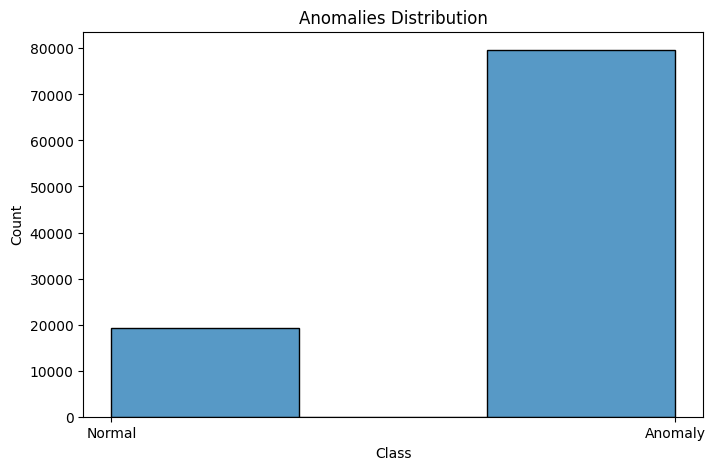

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_xgb, bins=3, kde=False)
plt.xticks([0, 1], ["Normal", "Anomaly"])
plt.title("Anomalies Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

### One-Class SVM

In [37]:
from sklearn.svm import OneClassSVM

start_time = time.time()
oc_svm = OneClassSVM(kernel="rbf", gamma="auto", nu=0.05)
oc_svm.fit(X_train[Y_train == 0])
finish_time = time.time()

print("Time take to train:  ", round(finish_time - start_time, 1))

Time take to train:   87.6


In [38]:
y_pred_oc_svm = oc_svm.predict(X_test)
y_pred_oc_svm = np.where(y_pred_oc_svm == -1, 1, 0)

f1_svm = f1_score(Y_test, y_pred_oc_svm)
print("Oneclass SVM:  ", round(f1_svm, 4))

print(classification_report(Y_test, y_pred_oc_svm))

Oneclass SVM:   0.9885
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     19150
           1       0.99      0.99      0.99     79655

    accuracy                           0.98     98805
   macro avg       0.97      0.97      0.97     98805
weighted avg       0.98      0.98      0.98     98805



In [39]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score, classification_report

2025-03-03 19:41:03.037127: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-03 19:41:03.041565: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-03 19:41:03.150855: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-03 19:41:03.193279: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741012863.273553    6030 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741012863.28

In [40]:
def plot_results(history, title):
    plt.figure(figsize=(12, 6))
    plt.title(title)
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.legend()

In [46]:
X_train.shape

(395216, 20)

## Artificial Neural Network

In [52]:
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dropout(0.1),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy")
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), callbacks=[monitor], verbose=1, epochs=20)

Epoch 1/20
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 0.0264 - val_loss: 0.0039
Epoch 2/20
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.0054 - val_loss: 0.0034
Epoch 3/20
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.0049 - val_loss: 0.0036
Epoch 4/20
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 0.0044 - val_loss: 0.0034
Epoch 5/20
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 6/20
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.0039 - val_loss: 0.0030
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 1.


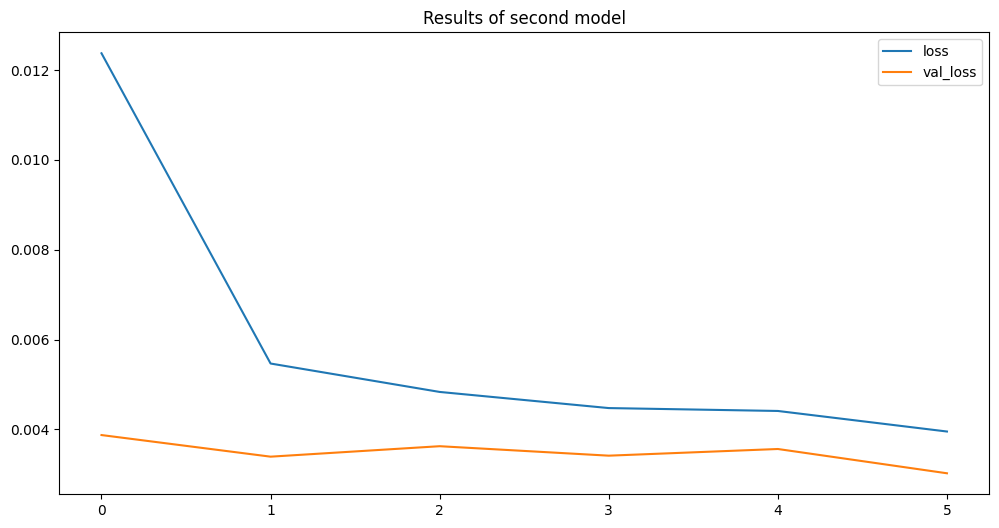

In [53]:
plot_results(history=history, title="Results of second model")

In [56]:
model_y_pred = model.predict(X_test)
model_y_pred = (model_y_pred > 0.5).astype(int)

#calculate f1 score
model_f1_score = f1_score(Y_test, model_y_pred)

print(f"F1 score for DL model:  {model_f1_score:.4f}")
print(classification_report(Y_test, model_y_pred))

3088/3088 ━━━━━━━━━━━━━━━━━━━━ 1s 411us/step
F1 score for DL model:  0.9994
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19150
           1       1.00      1.00      1.00     79655

    accuracy                           1.00     98805
   macro avg       1.00      1.00      1.00     98805
weighted avg       1.00      1.00      1.00     98805



In [55]:
model.save("ANN_model.keras")